$\textbf{DS121 - STATISTICAL METHODS II} \\ \texttt{2Q SY2324}$

Instructor: EDGAR M. ADINA

## <center> Inferences in Regression Analysis

In this lesson, you will look at two correlated phenomena and predict unseen data points. We will need the "datascience" module in Python to carry out the commands.

Run the following command to install the module (only if not yet installed).

In [1]:
pip install datascience

  Using cached datascience-0.17.6-py3-none-any.whl (732 kB)
  Obtaining dependency information for folium>=0.9.1 from https://files.pythonhosted.org/packages/18/09/8569904c8ce5679cc02826d98de633c07abcd2443a23181e5f71ff9dacbc/folium-0.15.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
Using cached folium-0.15.1-py2.py3-none-any.whl (97 kB)
Using cached branca-0.7.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


Run the cell below to import the code we’ll use in this notebook. Don’t worry about getting an output, simply run the cell.

In [2]:
from datascience import Table
import numpy as np
import matplotlib.pyplot as plots
import scipy as sp
%matplotlib inline
import statsmodels.formula.api as smf
plots.style.use('fivethirtyeight')

We will be using data from the online data archive of Prof. Larry Winner of the University of Florida. The file hybrid contains data on hybrid passenger cars sold in the United States from 1997 to 2013. In order to analyze the data, we must first import it to our Jupyter notebook and create a table.

Be sure to download the data file from BB and upload it to your respective Notebook folders.

In [3]:
hybrid = Table.read_table('hybrid.csv')  # Imports the data and creates a table
hybrid.show(5)  # Displays the first five rows of the table

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


*References: vehicle: model of the car, year: year of manufacture, msrp: manufacturer’s suggested retail price in 2013 dollars, acceleration: acceleration rate in km per hour per second, mpg: fuel economy in miles per gallon, class: the model’s class.*

Let’s visualize some of the data to see if we can spot a possible association.

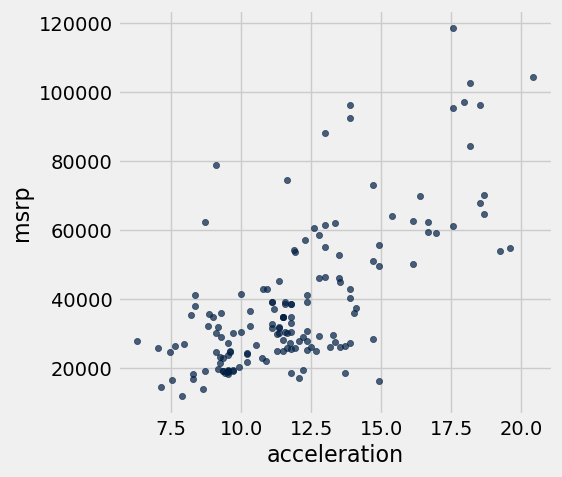

In [4]:
hybrid.scatter('acceleration', 'msrp')

As we can see in the above scatter, there seems to be a positive association between acceleration and price. That is, cars with greater acceleration tend to cost more, on average; conversely, cars that cost more tend to have greater acceleration on average.

What about miles per gallon and price? Do you expect a positive or negative association?

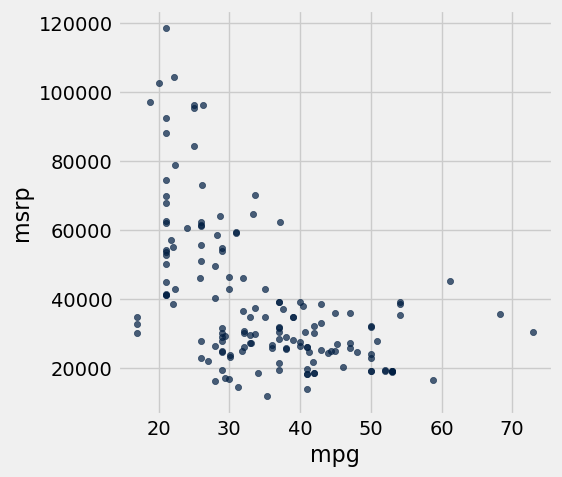

In [5]:
hybrid.scatter('mpg', 'msrp')

Along with the negative association, the scatter diagram of price versus efficiency shows a **non-linear relation** between the two variables, i.e., the points appear to be clustered around a curve, not around a straight line.

### Exercise!!!

Subset the data so that you will only dealing at SUVs. Choose only SUVs and then make a scatter plot of mpg and msrp.

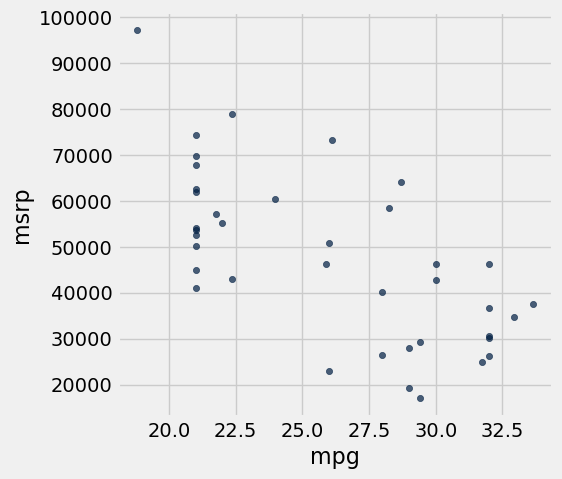

In [8]:
suv = hybrid.where('class', 'SUV')
suv.scatter('mpg', 'msrp')

## Correlation

Let’s calculate the correlation coefficient between acceleration and price. We can use the **np.corrcoef** function on the two variable (columns here) that we want to correlate:

In [9]:
sp.stats.pearsonr(hybrid['acceleration'], hybrid['msrp'])

PearsonRResult(statistic=0.69557789969139794, pvalue=1.9158000667128297e-23)

This function yields two numbers. The first number is our $r$-value, and the second number is the $p$-value for our correlation. A $p$-value of under .05 indicates strong validity in the correlation. Our coefficient here is 0.6955779, and our $p$-value is low implying *strong positive correlation*.

## Regression

We can fit the model by setting up an equation without the $\alpha$ and $\epsilon_i$ in the **formula** parameter of the function below, we’ll give it our data variable in the **data** parameter. Then we just fit the model and ask for a summary. We’ll try a model for:

$$ MSRP_i=\alpha + \beta*ACCELATION + \epsilon_i$$

The variable we want to predict (or model) is the left side $y$ variable, the variable which we think has an influence on our left side variable is on the right side. The  $\alpha$ term is the y-intercept and the $\epsilon_i$ describes the randomness.

In [10]:
mod = smf.ols(formula='msrp ~ acceleration', data=hybrid.to_df())
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   msrp   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.92e-23
Time:                        02:19:53   Log-Likelihood:                -1691.7
No. Observations:                 153   AIC:                             3387.
Df Residuals:                     151   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.128e+04   5244.588     -4.058   

That’s a lot of information! While we should consider everything, we’ll look at the $p$-value, the coef, and the $R$-squared. A $p$-value of < .05 is generally considered to be statistically significant. The coef is how much increase one sees in the left side variable for a one unit increase of the right side variable. So for a 1 unit increase in acceleration one might see an increase of $5067 MSRP, according to our model. 

But how great is our model? That’s the R-squared. The R-squared tells us how much of the variation in the data can be explained by our model, .484 isn’t that bad, but obviously more goes into the MSRP value of a car than just acceleration.

We can plot this line of “best fit” too:

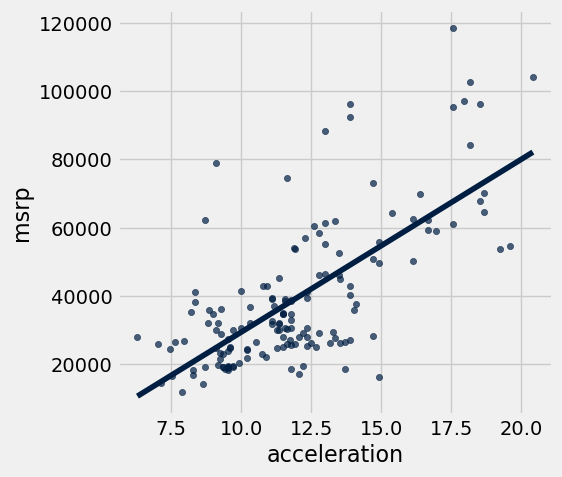

In [11]:
hybrid.scatter('acceleration', 'msrp', fit_line=True)

### Covariate

We might want to add another independent variable because we think it could influence our dependent variable. If we think mpg could have an influence and needs to be controlled for we just add that to the equation. 

$$ MSRP_i=\alpha + \beta_1*ACCELATION + \beta_2*MPG \epsilon_i$$

In [12]:
mod = smf.ols(formula='msrp ~ acceleration + mpg', data=hybrid.to_df())
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   msrp   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     83.66
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           3.93e-25
Time:                        02:19:57   Log-Likelihood:                -1685.0
No. Observations:                 153   AIC:                             3376.
Df Residuals:                     150   BIC:                             3385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5796.5295   8861.211      0.654   

Interpret this last output:

The multiple linear regression model shows that acceleration significantly increases msrp (p < 0.001), with a coefficient of 4176.43, while mpg has a negative impact on msrp (p < 0.001), with a coefficient of -471.90. However, the intercept is not statistically significant (p = 0.514). The model explains about 52.7% of the variability in msrp. Refinement of the model, particularly regarding the intercept, may be needed for better accuracy.

In [1]:
print(1)

1
